# Welter
## Issue 18- LkCa 4 photometry analysis


July, 2016

## Other data

There is more photometry out there:

|Study|band|
|---|---|
|Integral-OMC |$V-$band|
|TrES|$r-$band|
|NSVS|unfiltered|
|Herbst et al.| UBVR|
|ASAS3| $V$|
|SuperWASP| "WASP V" 400 to 700 nm|
|Coyote I| UBVRI|



In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
% matplotlib inline
% config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('paper', font_scale=1.4)
sns.set_style('ticks')

In [3]:
import pandas as pd

## Integral-OMC data

In [4]:
ff = fits.open('../data/photometry/IOMC_1827000018.fits')

In [6]:
hdu1 = ff[1]

In [10]:
hdu1.data.shape

(138,)

In [11]:
tt = hdu1.data['BARYTIME']+2451544.5

In [12]:
fl = hdu1.data['MAG_V']

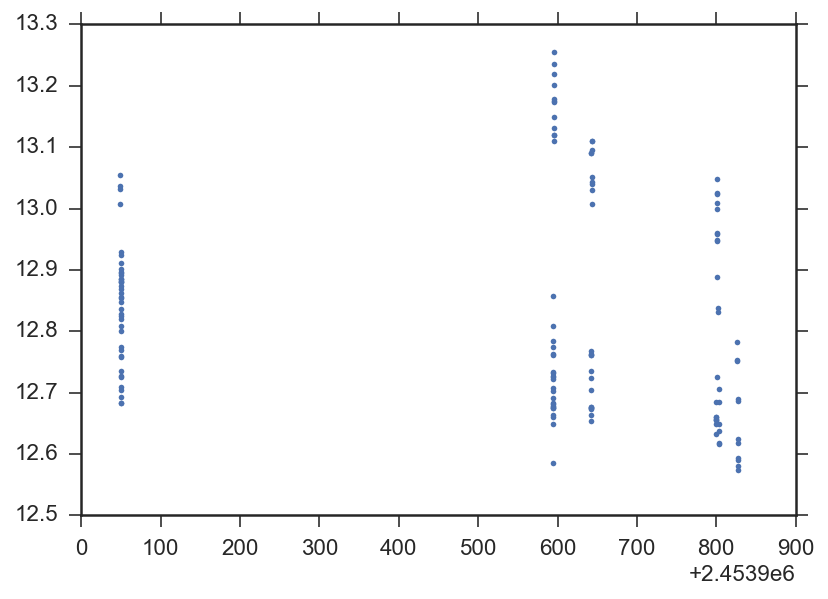

In [13]:
plt.plot(tt, fl, '.')

(13.3, 12.5)

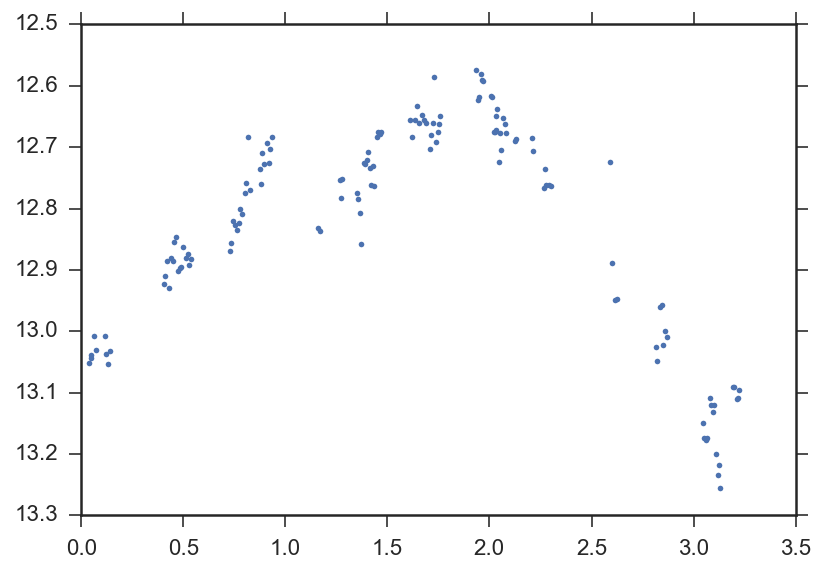

In [14]:
plt.plot(np.mod(tt, 3.375), fl, '.')
plt.ylim(13.3, 12.5)

OK, so 138 extra $V$ band photometric data points spread out over 2-3 years.  Not bad.

In [15]:
OMC_out = pd.DataFrame({'HJD':hdu1.data['BARYTIME']+2451544.5,
                        'Vmag':hdu1.data['MAG_V'],
                        'Verr':hdu1.data['ERRMAG_V']}, columns=['HJD', 'Vmag', 'Verr'])

In [16]:
OMC_out.to_csv('../data/photometry/LkCa4_Integral_OMC.csv', index=False)

## NSVS
This data comes from ROTSE.  Unfortunately it is *un*filtered, which makes it hard to compare directly to the other $V-$band data.  Still, maybe it's worth a peak.  
I accessed the data from: http://skydot.lanl.gov/nsvs/star.php?num=6759899&mask=32004  
It's in a pesky HTML format, so I just copied and pasted the output, rather than mess around with HTML tags.

In [17]:
nsvs_raw = pd.read_csv('../data/photometry/NSVS_LkCa4_unfiltered.tsv', delim_whitespace=True)

In [18]:
#nsvs_raw.tail()

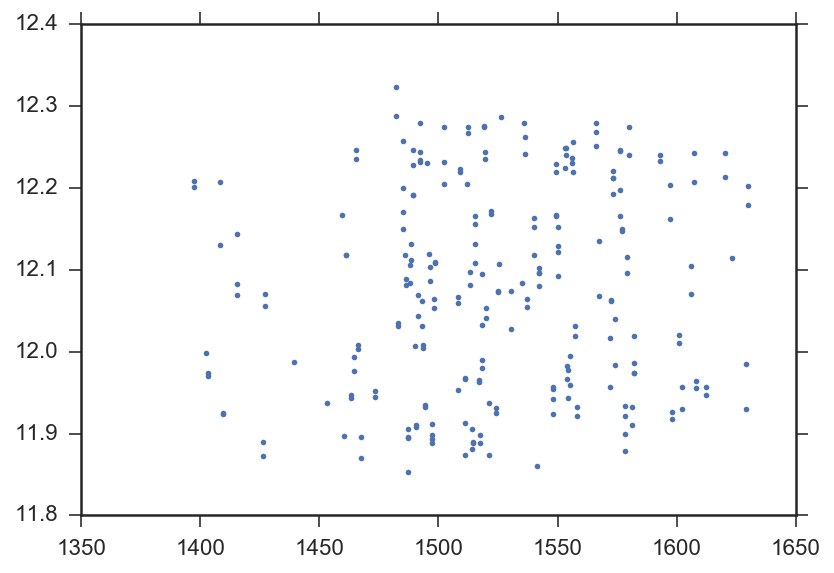

In [19]:
plt.plot(nsvs_raw['MJD-50000'], nsvs_raw.mag, '.')

(12.4, 11.8)

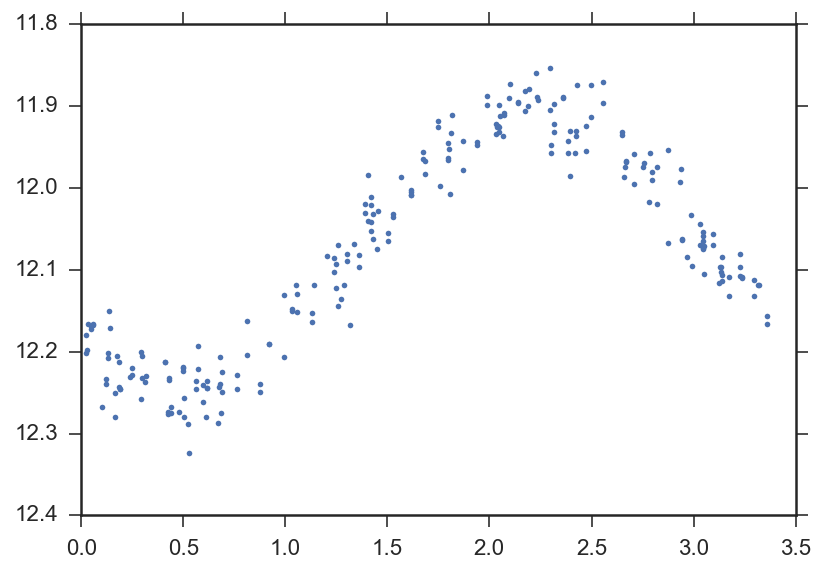

In [20]:
plt.plot(np.mod(nsvs_raw['MJD-50000'], 3.375), nsvs_raw.mag, '.')
plt.ylim(12.4, 11.8)

Cool, but not very helpful since the filter isn't standardized.

## Herbst & Shevchenko 1999
I downloaded the data from Vizier: http://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/AJ/118/1043  
It has these notes:  
>#Note (1): JD may be negative (for dates before 2440000)
#Note (2): *: the V-R magnitudes given were made in the Johnson system

**This data originally appeared in**: 
- Vrba et al. 1993
- Bouvier et al. 1993

and later appeared in:
- Grankin et al. 2008

In [21]:
#! head ../data/photometry/J_AJ_118_1043_wtts_lkca4.dat.csv

In [22]:
hs99 = pd.read_csv('../data/photometry/J_AJ_118_1043_wtts_lkca4.dat.csv', delim_whitespace=True, skiprows=[1,2])

In [23]:
hs99['JD'] = hs99['JD']++2440000.0

Convert 99.99's to `NaN`s.

In [24]:
bi = hs99 == 99.99
hs99[bi] = np.NaN

In [25]:
hs99['Bmag'] = hs99['B-V']+hs99['Vmag']
hs99['Rmag'] = hs99['Vmag']-hs99['V-R']
hs99['Imag'] = hs99['Rmag']-hs99['R-I']
hs99['Umag'] = hs99['U-B']+hs99['Bmag']

In [26]:
#ad = pd.read_csv('../data/photometry/LkCa4_grankin.dat')

#plt.plot(hs99.JD, hs99.Vmag, 'o')
#plt.plot(ad.HJD, ad.Vmag, '.')
#plt.vlines(2449000.0, 12.9, 12.2)
#plt.ylim(12.9, 12.2)

Drop the photometry after JD $\sim2449000.0$, since it's repeated with Grankin data.

In [27]:
bi2 = hs99.JD > 2449000.0
hs99 = hs99.drop(hs99.index[bi2], axis=0)

(12.9, 12.2)

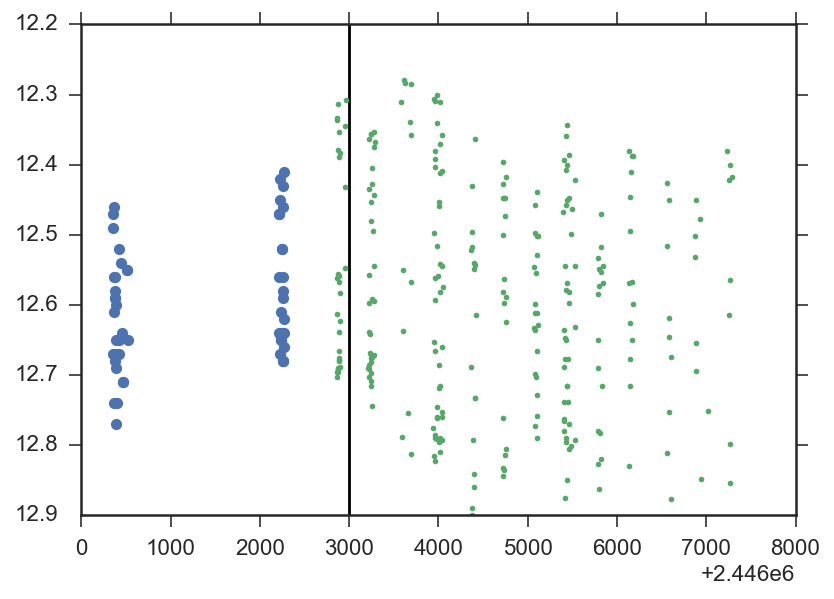

In [29]:
ad = pd.read_csv('../data/photometry/LkCa4_grankin.dat')

plt.plot(hs99.JD, hs99.Vmag, 'o')
plt.plot(ad.HJD, ad.Vmag, '.')
plt.vlines(2449000.0, 12.9, 12.2)
plt.ylim(12.9, 12.2)

In [30]:
vid = hs99['JD'] < 2447000.0 #Vrba 1993
boid = hs99['JD'] > 2447000.0 #Vrba 1993
hs99['source'] = np.NaN
hs99.source[vid] = 'Vrba et al. 1993'
hs99.source[boid] = 'Bouvier et al. 1993'

In [32]:
hs99.to_csv('../data/photometry/LkCa4_herbst99.dat', index=False)

## Bouvier et al. 1993 (Coyote)
Data available here:
ftp://cdsarc.u-strasbg.fr/pub/cats/J/A+AS/101/485/table1  

**This data is included in the Herbst 1999 reanalysis data!**

In [33]:
#! curl ftp://cdsarc.u-strasbg.fr/pub/cats/J/A+AS/101/485/table1 > ../data/photometry/bouvier1993_tbl1.tsv

In [34]:
#! head ../data/photometry/bouvier1993_tbl1.tsv

In [35]:
#bv_cols = ['name1', 'junk', 'HBC_num', 'JD-2400000', 'Vmag', 'B-V', 'U-B', 'V-R', 'V-I']
#bvd = pd.read_fwf('../data/photometry/bouvier1993_tbl1.tsv', usecols=[0,2,3,4,5,6,7,8],
#                  header=None, index_col=False, names=bv_cols)

In [36]:
#bvd_lkca4 = bvd[bvd.name1 == 'LkCa-4']

In [37]:
#plt.plot(np.mod(bvd_lkca4['JD-2400000'], 3.375), bvd_lkca4.Vmag, '.')
#plt.ylim(12.7, 12.4)

## ASAS3

> Each data row consists of the following fields:
> -  HJD-2450000
> -  magnitudes (one for each aperture)
> -  frame errors describing average photometric quality of the frame (for each >aperture)
> -  frame number
> -  grade :
>    A - best data, no 29.999 (not measured) indication
>    B - mean data, no 29.999 (not measured) indication
>    C - A and B with 29.999 (not measured) indication
>    D - worst data, probably useless


In [144]:
#! curl http://www.astrouw.edu.pl/cgi-asas/asas_cgi_get_data?041628+2807.6,asas3 > ../data/photometry/ASAS3_LkCa4.dat

In [145]:
#! head ../data/photometry/ASAS3_LkCa4.dat

In [159]:
as3_names = ['HJD','MAG_0','MAG_1','MAG_2','MAG_3','MAG_4','MER_0','MER_1','MER_2','MER_3','MER_4','GRADE','FRAME']
as3 = pd.read_csv('../data/photometry/ASAS3_LkCa4.dat', comment='#', delim_whitespace=True, names=as3_names)

Drop the overtly bad quality data.  Hopefully the errors are estimated correctly for everything else (they seem reasonable...)

In [160]:
gi = (as3.MAG_0 < 20) & (as3.GRADE != 'D')
as3 = as3[gi]

In [161]:
#plt.plot(as3.HJD+2450000, as3.MAG_0, '.')
#plt.ylim(13.3, 12.4)

In [162]:
#plt.plot(np.mod(as3.HJD+2450000, 3.375), as3.MAG_0, '.')
#plt.ylim(13.3, 12.4)

A bit noisy because I'm smearing over 2 years of data.

In [163]:
as3['JD_like'] = as3.HJD + 2450000.0
as3['date_type'] = 'HJD'

Just use "MAG_0", they're all fairly similar...

In [164]:
as3['Vmag'], as3['Verr']= as3.MAG_0, as3.MER_0

In [165]:
as3.columns

Index(['HJD', 'MAG_0', 'MAG_1', 'MAG_2', 'MAG_3', 'MAG_4', 'MER_0', 'MER_1',
       'MER_2', 'MER_3', 'MER_4', 'GRADE', 'FRAME', 'JD_like', 'date_type',
       'Vmag', 'Verr'],
      dtype='object')

In [166]:
as3.drop(['HJD','MAG_0', 'MAG_1', 'MAG_2', 'MAG_3', 'MAG_4', 'MER_0', 'MER_1',
       'MER_2', 'MER_3', 'MER_4', 'GRADE', 'FRAME'], axis=1, inplace=True)

In [168]:
as3['source'] = 'ASAS3'

In [170]:
as3.to_csv('../data/photometry/LkCa4_asas3.csv', index=False)

## SuperWASP
Unfortunately SuperWASP uses broadband filters.  See Figure 3 of Pollacco et al.

In [171]:
#! head ../data/photometry/1SWASP_J041628.10+280735.5.csv

In [172]:
sw_cols = ['HJD','camera','mag','mag_err']
sw = pd.read_csv('../data/photometry/1SWASP_J041628.10+280735.5.csv', names=sw_cols, skiprows=1)

In [173]:
#sw.head()

(13.5, 12.0)

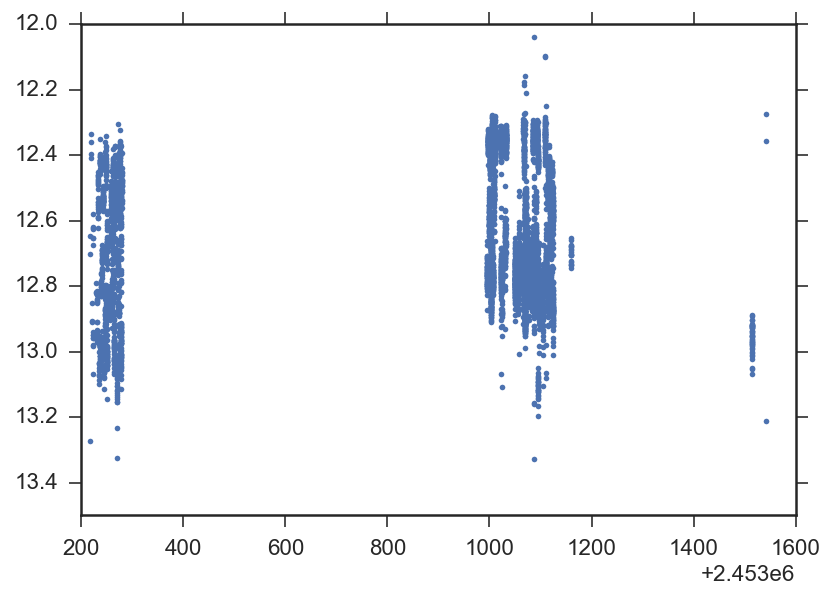

In [174]:
plt.plot(sw.HJD, sw.mag, '.')
plt.ylim(13.5, 12.0)

(13.5, 12.0)

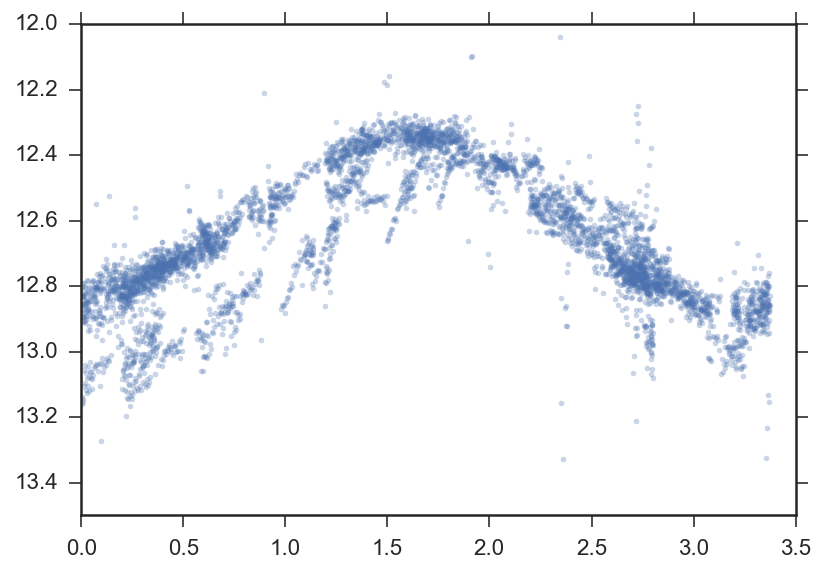

In [175]:
plt.plot(np.mod(sw.HJD, 3.375), sw.mag, '.', alpha=0.3)
plt.ylim(13.5, 12.0)

## TrES
From Devor et al. 2008, from a website that differed from the one in the footnote of the 2008 paper.  
Unfortunately this is $r-$band photometry

In [176]:
#! head ../data/photometry/TrES_rband_T-Tau0-01262.lc

In [177]:
cols = ['HJD-2400000', 'r_band', 'r_unc']
TrES = pd.read_csv('../data/photometry/TrES_rband_T-Tau0-01262.lc', names=cols, delim_whitespace=True)

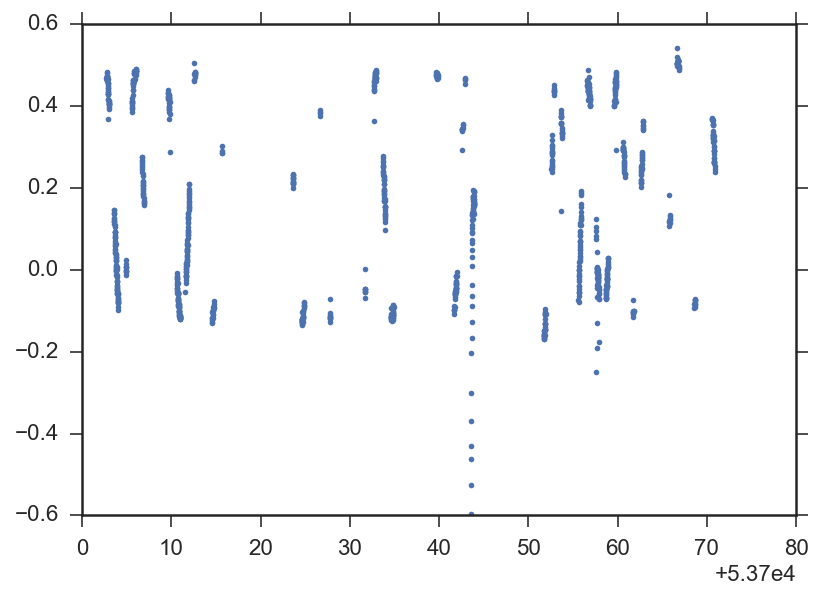

In [178]:
plt.plot(TrES['HJD-2400000'], TrES.r_band, '.')

The data is "normalized", is that just mean-subracted?  

(0.6, -0.5)

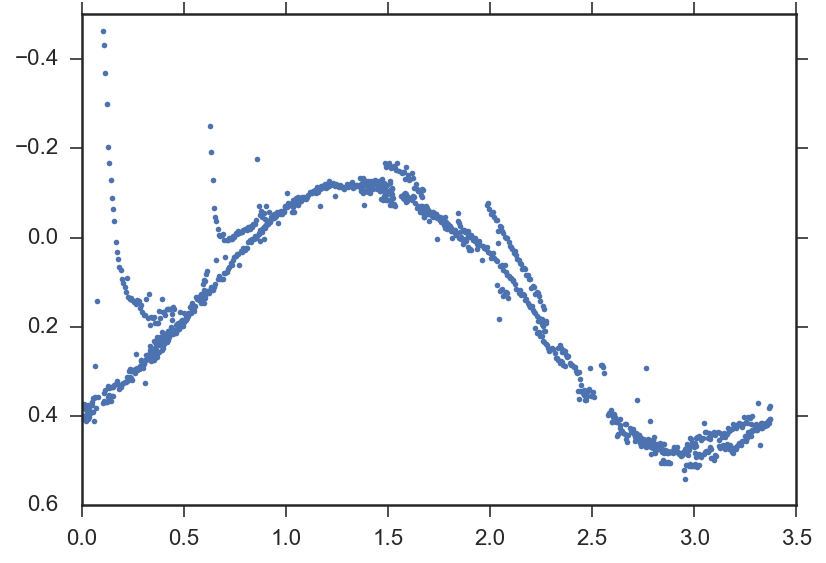

In [179]:
plt.plot(np.mod(TrES['HJD-2400000'], 3.375), TrES.r_band, '.')
plt.ylim(0.6, -0.5)

## APASS
Not many data points, only 4 I think...  
From this query:  
http://tombstone.physics.mcmaster.ca/APASS/conesearch_offset.php?radeg=64.11708&decdeg=28.12658&raddeg=0.005

In [180]:
#! head ../data/photometry/APASS_LkCa4.dat

In [181]:
#ap_cols = ['JD_offset', 'mag', 'unc']
#ap_filter = pd.read_csv('../data/photometry/APASS_LkCa4.dat', 
#                        delim_whitespace=True, skiprows=1, names='ABCDE', usecols='C')
#ap = pd.read_csv('../data/photometry/APASS_LkCa4.dat', sep=',', names=ap_cols, skiprows=1, comment='#')
#ap['band'] = ap_filter.C
#ap.head()

Looks like APASS data is included in the AAVSO data anyways.

## AAVSO data
Need to search for V1068 Tau

In [81]:
#! curl https://www.aavso.org/sites/default/files/tmp/aavsodata_578db6103872a.txt > ../data/photometry/AAVSO_LkCa4.dat

In [103]:
#! head ../data/photometry/AAVSO_LkCa4.dat

In [83]:
aavso = pd.read_csv('../data/photometry/AAVSO_LkCa4.dat')

In [84]:
aavso.columns

Index(['JD', 'Magnitude', 'Uncertainty', 'HQuncertainty', 'Band',
       'Observer Code', 'Comment Code(s)', 'Comp Star 1', 'Comp Star 2',
       'Charts', 'Comments', 'Transfomed', 'Airmass', 'Validation Flag',
       'Cmag', 'Kmag', 'HJD', 'Star Name', 'Observer Affiliation',
       'Measurement Method', 'Grouping Method', 'ADS Reference', 'Digitizer',
       'Credit'],
      dtype='object')

In [119]:
aavso.Band.unique()

array(['B', 'V', 'R', 'I', 'Vis.', 'CV'], dtype=object)

Throw away the unknown photometric bands.

In [120]:
gi = (aavso.Band != 'Vis.') & (aavso.Band != 'CV')

In [121]:
aavso = aavso[gi]

In [123]:
aa_new = aavso[aavso.columns.values[[0,1,2,4]]].pivot(index='JD', columns='Band')

In [127]:
aa_new.to_csv('../data/photometry/LkCa4_aavso.csv')

Seems legit.

## All together

ASASSN

In [56]:
asassn = pd.read_csv('../data/photometry/LkCa4_ASASSN_aggregated.dat')

(13.3, 12.0)

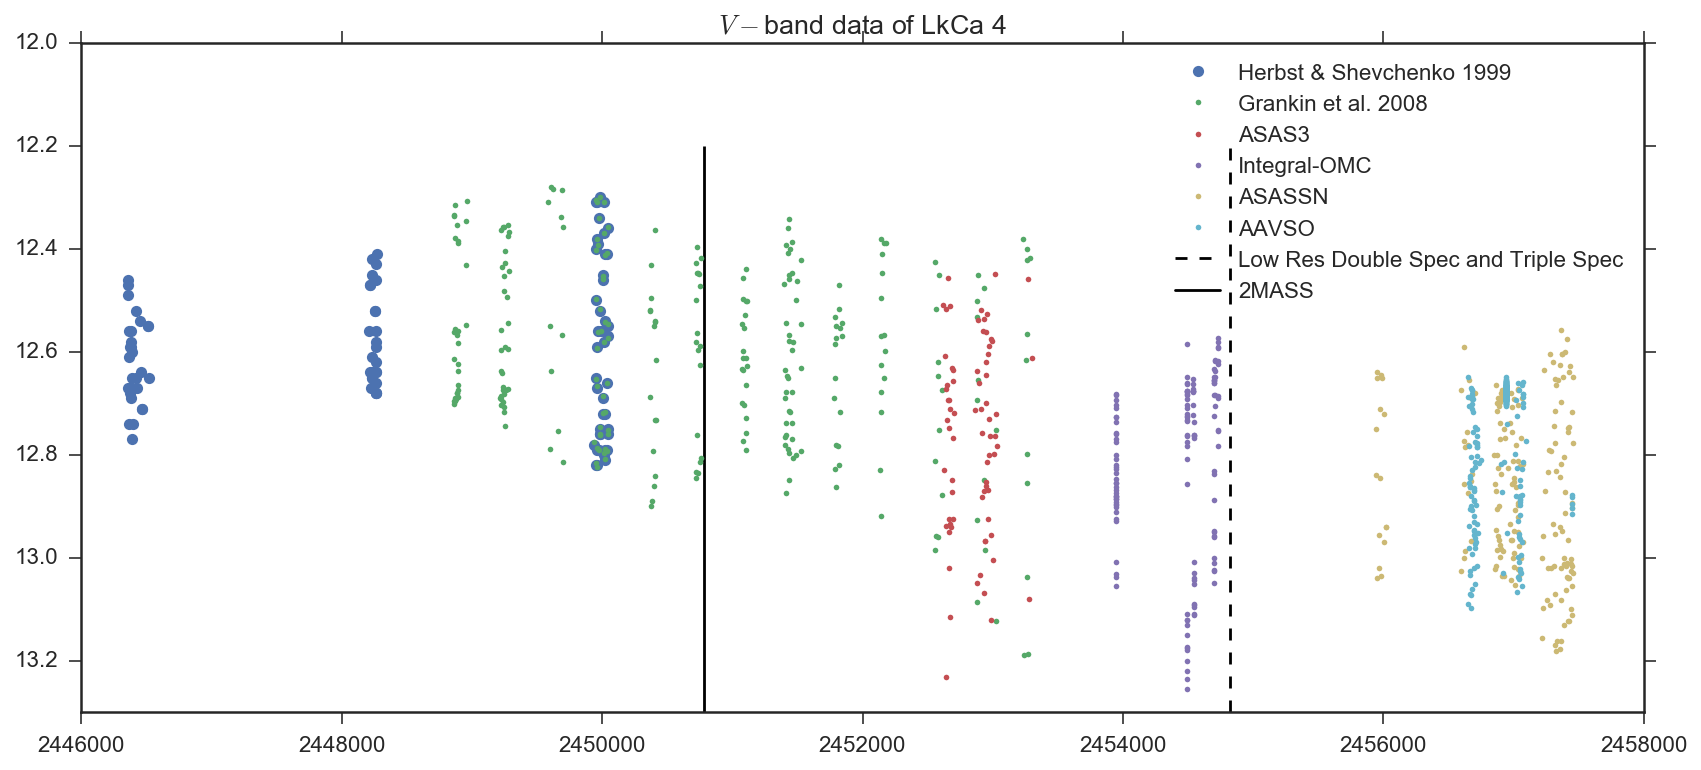

In [63]:
plt.figure(figsize=(14, 6))
plt.plot(hs99.JD+2440000.0, hs99.Vmag, 'o', label='Herbst & Shevchenko 1999')
plt.plot(ad.HJD, ad.Vmag, '.', label='Grankin et al. 2008')
#plt.plot(bvd_lkca4['JD-2400000']+2440000.0, bvd_lkca4.Vmag, '.', label='Bouvier et al. 1993')
plt.plot(as3.HJD+2450000, as3.MAG_0, '.', label='ASAS3')
plt.plot(tt, fl, '.', label='Integral-OMC')
plt.plot(asassn.JD, asassn.mean_mag, '.', label='ASASSN')
plt.plot(aavso.JD[gi], aavso.Magnitude[gi], '.', label='AAVSO')
plt.vlines(2454826.0, 13.3, 12.2, linestyles='dashed',label='Low Res Double Spec and Triple Spec')
plt.vlines(2450781.0, 13.3, 12.2, label='2MASS')
plt.legend(loc='best')
plt.title('$V-$band data of LkCa 4')
plt.ylim(13.3, 12.0)

#plt.xlim(2446357.4-50, 2446519.2+50)

(2446000, 2458000)

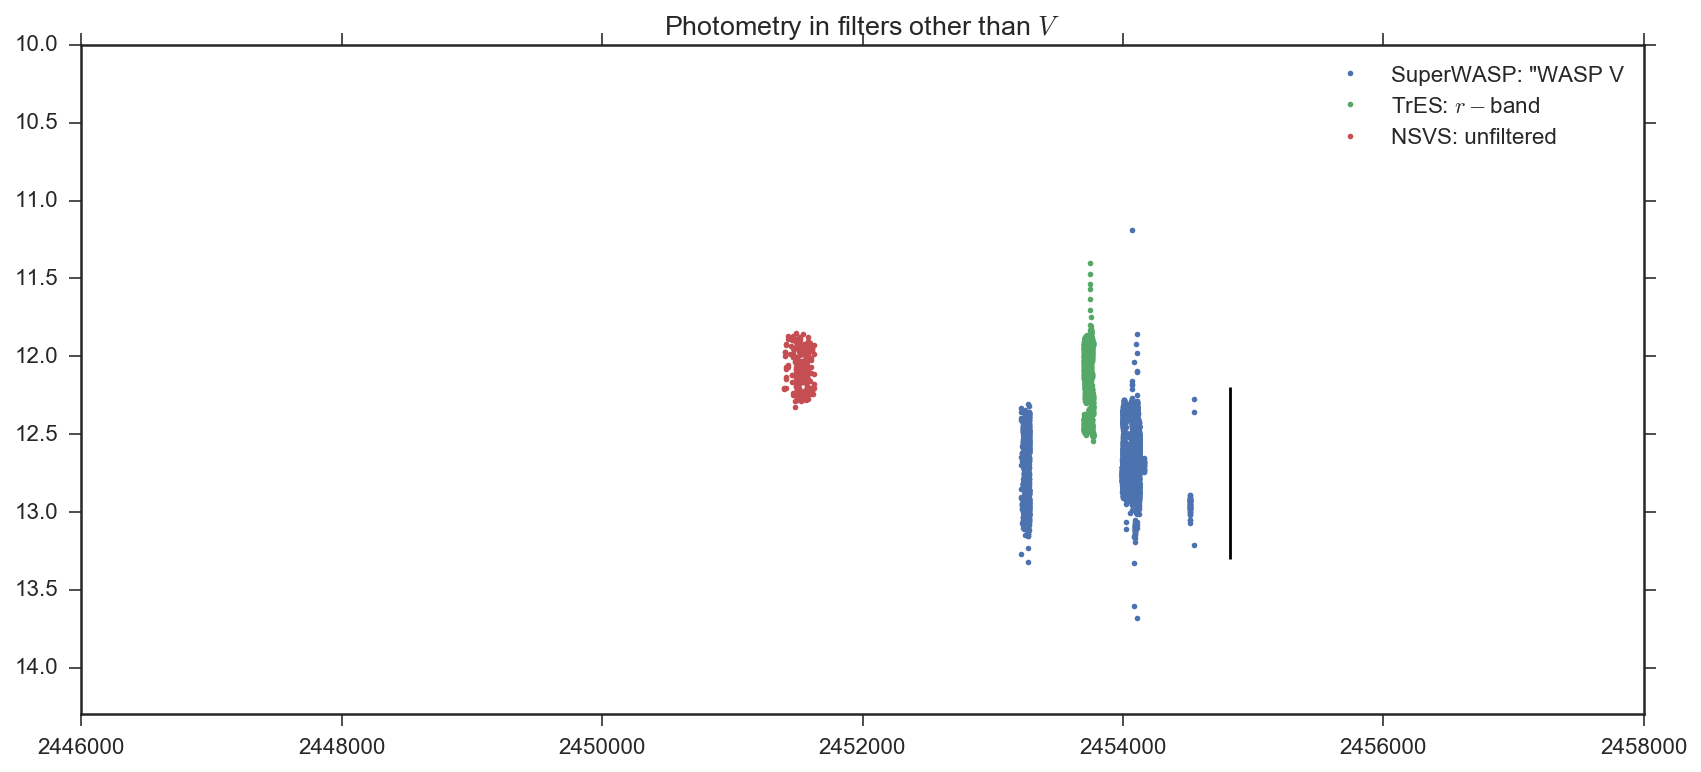

In [59]:
plt.figure(figsize=(14, 6))
plt.plot()
plt.plot(sw.HJD, sw.mag, '.', label ='SuperWASP: "WASP V')
plt.plot(TrES['HJD-2400000']+2400000.0, TrES.r_band+12.0, '.', label='TrES: $r-$band')
plt.plot(nsvs_raw['MJD-50000']+2400000.5+50000, nsvs_raw.mag, '.', label= 'NSVS: unfiltered')

plt.vlines(2454826.0, 13.3, 12.2)

plt.title('Photometry in filters other than $V$')
plt.legend(loc='best')
plt.ylim(14.3, 10.0)
plt.xlim(2446000, 2458000)

## The end.